### Introduction to Pytorch

In [89]:
import torch
import numpy as np

In [90]:
torch.__version__

'1.6.0'

In [91]:
x = [1,2,3]
array = np.array(x); array

array([1, 2, 3])

In [92]:
tensor = torch.tensor(x); tensor

tensor([1, 2, 3])

In [93]:
array.shape, tensor.shape

((3,), torch.Size([3]))

In [94]:
array.mean()

2.0

In [95]:
tensor.float().mean()

tensor(2.)

In [96]:
tensor = torch.rand((2,2))

In [97]:
tensor

tensor([[0.7191, 0.5812],
        [0.8856, 0.8495]])

In [98]:
#Matrix multiplication
tensor@tensor

tensor([[1.0319, 0.9117],
        [1.3892, 1.2364]])

In [99]:
#Transpose
tensor.T


tensor([[0.7191, 0.8856],
        [0.5812, 0.8495]])

In [100]:
tensor = torch.tensor([1,5,23])
tensor.view((3,1))

tensor([[ 1],
        [ 5],
        [23]])

## Linear Regression

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [102]:
data = np.random.multivariate_normal([3,4],[[1,0.7],[0.7,1]],size=200)
x = data[:,0]
y = data[:,1]

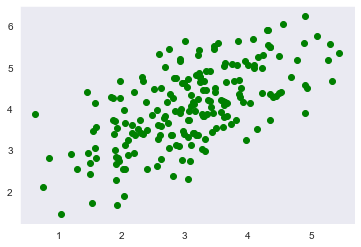

In [103]:
plt.scatter(x,y,color='g')
plt.show()

In [104]:
x, y = torch.tensor(x), torch.tensor(y)

In [105]:
m = torch.nn.Parameter(data=torch.randn(1))
c = torch.nn.Parameter(data=torch.randn(1))

In [106]:
y_pred = m*x + c

In [107]:
# y_pred

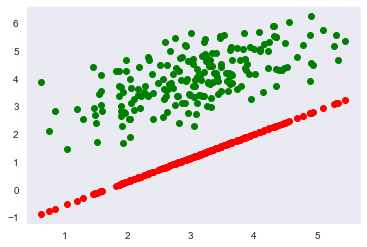

In [108]:
plt.scatter(x.detach().numpy(),y_pred.detach().numpy(),color='r')
plt.scatter(x.detach().numpy(),y.detach().numpy(),color='g')

In [109]:
def mse(y_pred,y):
    return  ((y_pred-y)**2).mean()

In [110]:
mse(y_pred,y)


tensor(8.6289, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [111]:
ll = []
for i in range(200):
    y_pred = m * x + c
    lr = 1e-3

    loss = mse(y_pred,y)
    loss.backward()
    ll.append(loss)
    with torch.no_grad():
        m -= lr*m.grad
        c -= lr*c.grad

        m.grad.zero_()
        c.grad.zero_()

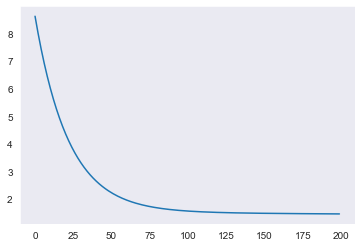

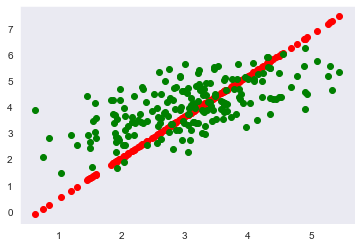

In [113]:
plt.plot(ll)
plt.show()
plt.scatter(x.detach().numpy(),y_pred.detach().numpy(),color='r')
plt.scatter(x.detach().numpy(),y.detach().numpy(),color='g')
plt.show()

In [114]:
ll[-1]

tensor(1.4562, dtype=torch.float64, grad_fn=<MeanBackward0>)